Generate a random noise image, calculates its Shannon entropy, and visualizes the image along with its entropy value.

1. **Import Libraries:**
   - `numpy` is imported for numerical operations.
   - `matplotlib.pyplot` is imported for plotting.

2. **Define `shannon_entropy` Function:**
   - This function calculates the Shannon entropy of an image.
   - It creates a 2D histogram from the image data using `np.histogram2d`.
   - Converts the counts from the histogram into probabilities.
   - Computes the Shannon entropy using the formula Entropy Formula:

   Sum over all events x:
    P(x) * log2(P(x))

  Where:
  - P(x): Probability of event x.
  - log2: Base-2 logarithm.
 is the probability of each bin.

3. **Define `generate_noise_image` Function:**
   - This function generates a random noise image of specified width and height with values between 0 and 1.

4. **Generate and Display Noise Image:**
   - A 100x100 random noise image is generated.
   - The Shannon entropy of the noise image is calculated using 10 bins in both x and y directions.
   - The calculated entropy is printed.
   - The noise image is displayed using `plt.imshow`, with the entropy value shown in the title.

Shannon Entropy: 5.8527


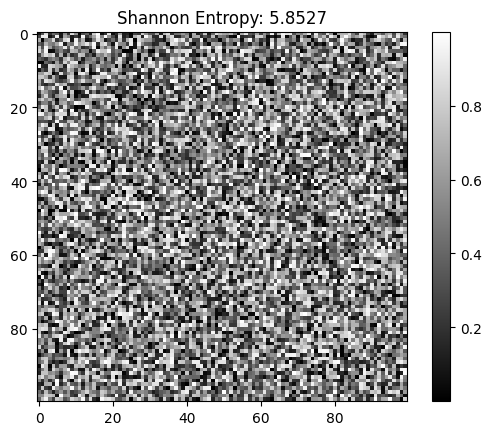

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def shannon_entropy(image_data, bins_x, bins_y):
    # Create a 2D histogram to count the number of points in each bin
    Counts, x_edges, y_edges = np.histogram2d(image_data[:,0], image_data[:,1], bins=(bins_x, bins_y))

    # Convert the counts to probabilities
    total_points = np.sum(Counts)
    probabilities = Counts / total_points

    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + (probabilities == 0)))

    return entropy

def generate_noise_image(width, height):
    # Generate a random noise image with values between 0 and 1
    noise_image = np.random.rand(width, height)
    return noise_image

# Generate a 100x100 random noise image
image_width = 100
image_height = 100
noise_image = generate_noise_image(image_width, image_height)

# Calculate Shannon entropy
bins_x = 10  # Number of bins in the x-direction
bins_y = 10  # Number of bins in the y-direction

entropy = shannon_entropy(noise_image, bins_x, bins_y)
print(f"Shannon Entropy: {entropy:.4f}")

# Display the noise image
plt.imshow(noise_image, cmap='gray')
plt.title(f"Shannon Entropy: {entropy:.4f}")
plt.colorbar()
plt.show()

###Analyze the Shannon entropy of a random noise image and visualize the results in a 3D interactive plot using Matplotlib.

In [ ]:
import numpy as np
import plotly.graph_objects as go


def shannon_entropy(image_data, bins_x, bins_y):
    # Create a 2D histogram to count the number of points in each bin
    Counts, x_edges, y_edges = np.histogram2d(image_data[:, 0], image_data[:, 1], bins=(bins_x, bins_y))

    # Convert the counts to probabilities
    total_points = np.sum(Counts)
    probabilities = Counts / total_points

    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + (probabilities == 0)))

    return entropy

def generate_noise_image(width, height):
    # Generate a random noise image with values between 0 and 1
    noise_image = np.random.rand(width, height)
    return noise_image

# Generate a 100x100 random noise image
image_width = 100
image_height = 100
noise_image = generate_noise_image(image_width, image_height)


# Create a range of values for bins_x and bins_y
bins_x_range = np.arange(2, 21, 1)
bins_y_range = np.arange(2, 21, 1)

# Initialize arrays to store entropy values
entropies = np.zeros((len(bins_x_range), len(bins_y_range)))

# Calculate Shannon entropy for different bin values
for i, bins_x in enumerate(bins_x_range):
    for j, bins_y in enumerate(bins_y_range):
        entropies[i, j] = shannon_entropy(noise_image, bins_x, bins_y)

# Create 3D meshgrid for bins_x and bins_y
bins_x, bins_y = np.meshgrid(bins_x_range, bins_y_range)

# Create an interactive 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=entropies, x=bins_x, y=bins_y, colorscale='Viridis')])

fig.update_layout(
    scene=dict(
        xaxis_title='Bins X',
        yaxis_title='Bins Y',
        zaxis_title='Shannon Entropy',
        xaxis=dict(nticks=10),
        yaxis=dict(nticks=10),
    )
)

fig.update_layout(title='Interactive 3D Shannon Entropy Plot')
fig.show()


Upload a black and image then this code will convert it into the shannon entropy 3D plot.

### Explanation

- **Image Loading:**
  - Uses OpenCV (`cv2.imread`) to load a grayscale image (`'/content/desert.jpg'`). Replace with your image path.

- **2D FFT Calculation:**
  - Applies `np.fft.fft2` to compute the 2D FFT (Fast Fourier Transform) of the grayscale image.
  - `np.fft.fftshift` shifts the zero-frequency component to the center of the spectrum for better visualization.

- **Magnitude Spectrum Calculation:**
  - Computes the magnitude spectrum of the shifted FFT result using `np.abs` and takes the logarithm (`np.log`) of the absolute values to enhance visualization.

- **Displaying Results:**
  - Uses Matplotlib (`plt.subplot` and `plt.imshow`) to create a figure with two subplots:
    - **Left Subplot (`subplot(121)`):** Displays the original grayscale image.
    - **Right Subplot (`subplot(122)`):** Displays the logarithmic magnitude spectrum of the FFT result.
  - Titles and axis ticks are added to enhance clarity in understanding the displayed images.

This plot visualize the FFT magnitude spectrum of a grayscale image, providing insights into the frequency components present within the image. Adjustments can be made to the image path and plotting parameters as needed for different images and visualizations.

In [6]:
import numpy as np
import plotly.graph_objects as go
from PIL import Image

def shannon_entropy(image_data, bins_x, bins_y):
    # Create a 2D histogram to count the number of points in each bin
    Counts, x_edges, y_edges = np.histogram2d(image_data[:, 0], image_data[:, 1], bins=(bins_x, bins_y))

    # Convert the counts to probabilities
    total_points = np.sum(Counts)
    probabilities = Counts / total_points

    # Calculate Shannon entropy
    entropy = -np.sum(probabilities * np.log2(probabilities + (probabilities == 0)))

    return entropy

def load_image(image_path):
    image = Image.open(image_path)
    image_data = np.array(image)
    return image_data

# Load a real image (replace 'image_path' with the path to your image)
image_path = '/content/sam.jpg'
real_image = load_image(image_path)

# Create a range of values for bins_x and bins_y
bins_x_range = np.arange(2, 21, 1)
bins_y_range = np.arange(2, 21, 1)

# Initialize arrays to store entropy values
entropies = np.zeros((len(bins_x_range), len(bins_y_range)))

# Calculate Shannon entropy for different bin values
for i, bins_x in enumerate(bins_x_range):
    for j, bins_y in enumerate(bins_y_range):
        entropies[i, j] = shannon_entropy(real_image, bins_x, bins_y)

# Create 3D meshgrid for bins_x and bins_y
bins_x, bins_y = np.meshgrid(bins_x_range, bins_y_range)

# Create an interactive 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=entropies, x=bins_x, y=bins_y, colorscale='Viridis')])

fig.update_layout(
    scene=dict(
        xaxis_title='Bins X',
        yaxis_title='Bins Y',
        zaxis_title='Shannon Entropy',
        xaxis=dict(nticks=10),
        yaxis=dict(nticks=10),
    )
)

fig.update_layout(title='Interactive 3D Shannon Entropy Plot for Real Image')
fig.show()


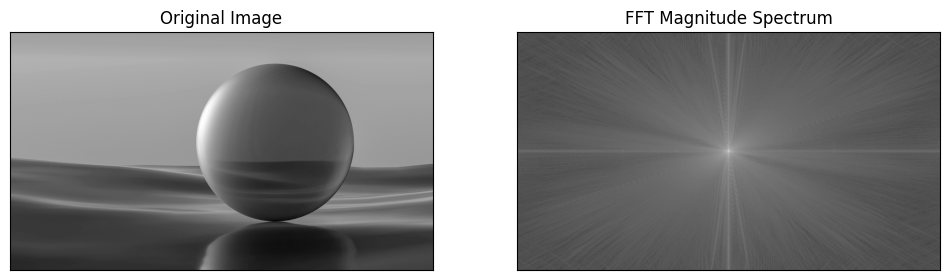

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image (replace with your image file)
image = cv2.imread('/content/sam.jpg', cv2.IMREAD_GRAYSCALE)

# Perform a 2D FFT
fft_result = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_result)  # Shift the zero frequency components to the center

# Calculate the magnitude spectrum (logarithmic scale)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# Display the original image and its FFT magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.xticks([]), plt.yticks([])

plt.show()


In [10]:
import numpy as np
import cv2
import plotly.graph_objects as go

# Load an image (replace with your image file)
image = cv2.imread('/content/sam.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the image to a smaller size
scale_percent = 20  # Adjust this scale factor as needed
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
image = cv2.resize(image, (width, height))

# Perform a 2D FFT
fft_result = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_result)  # Shift the zero frequency components to the center

# Calculate the magnitude spectrum (logarithmic scale)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# Create 3D meshgrid for the magnitude spectrum
height, width = magnitude_spectrum.shape
x = np.arange(0, width)
y = np.arange(0, height)
X, Y = np.meshgrid(x, y)

# Create an interactive 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(z=magnitude_spectrum, x=X, y=Y, colorscale='Viridis')])

fig.update_layout(
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Magnitude Spectrum (log scale)',
    )
)

fig.update_layout(title='Interactive 3D FFT Magnitude Spectrum Plot')

# You may want to further limit interactivity or rotation controls for low-end devices
fig.show(config={'displayModeBar': False})


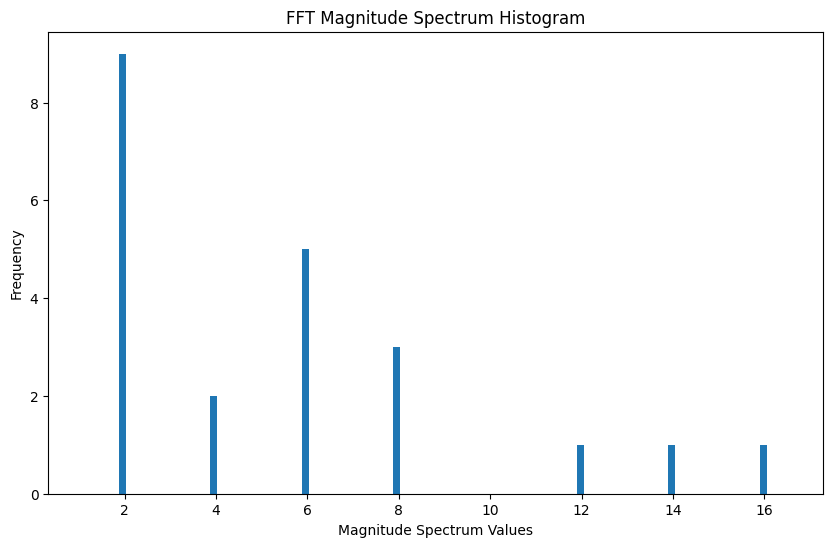

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load an image (replace with your image file)
image = cv2.imread('/content/sam.jpg', cv2.IMREAD_GRAYSCALE)

# Resize the image to a smaller size
scale_percent = 20  # Adjust this scale factor as needed
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
image = cv2.resize(image, (width, height))

# Perform a 2D FFT
fft_result = np.fft.fft2(image)
fft_shifted = np.fft.fftshift(fft_result)  # Shift the zero frequency components to the center

# Calculate the magnitude spectrum (logarithmic scale)
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)

# Calculate a histogram with specified number of bins
histogram, bin_edges = np.histogram(magnitude_spectrum, bins=100)  # Adjust the number of bins as needed

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(histogram, bins=bin_edges)
plt.title('FFT Magnitude Spectrum Histogram')
plt.xlabel('Magnitude Spectrum Values')
plt.ylabel('Frequency')
plt.show()
